In [1]:
%load_ext autoreload
%autoreload 2

from src import DataInterface, RunInfo, BaseTools, IbexCoremarkTools, IbexHwsecCoremarkTools
 


In [2]:
runinfo = RunInfo("src/run_info/ibex_hwsec_coremark.ini")
print(runinfo.comparison_data.entries)
print(runinfo.comparison_data.matrix_crc)
print(runinfo.debug.percent_failed_reads)
print(runinfo.optional_data.entries)

['seed_crc', 'list_crc', 'matrix_crc', 'state_crc', 'final_crc']
[0]crcmatrix     :
True
['alert_val', 'alter_cyc']


In [3]:
data_interface = DataInterface(runinfo)

Parsing SEU logs...
  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_241023/seu_2023-10-22_13-55-28.347225/log.txt
  'utf-8' codec can't decode byte 0x94 in position 500: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_241023/seu_2023-10-22_10-14-03.346185/log.txt
  'utf-8' codec can't decode byte 0xb7 in position 1339: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_241023/seu_2023-10-27_19-50-32.311015/log.txt
  'utf-8' codec can't decode byte 0xd0 in position 2396: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_241023/seu_2023-10-21_20-59-46.661259/log.txt
  'utf-8' codec can't decode byte 0x94 in position 500: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_241023/seu_2023-10-21_08-30-05.558418/log.txt
  'utf-8' codec can't decode byte 0xb7 in position 1320: invalid start byte
  Could not read /home/anvesh/projects/Ibex-A

In [4]:
path = "ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top."
path += "u_ibex_top.gen_regfile_ff.register_file_i"

node = data_interface.get_node_by_path(path)

In [5]:
name = "register_file_i"
nodes = data_interface.get_node_by_name(name)
print(f"{len(nodes)} node(s) found by name")

name_node = nodes[0]

print(f"Node by name: {name_node.soc_path}\nNode by path: {node.soc_path}")

1 node(s) found by name
Node by name: ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibex_top.gen_regfile_ff.register_file_i
Node by path: ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibex_top.gen_regfile_ff.register_file_i


In [6]:
node_data = data_interface.get_data_by_node(node)
root_data = data_interface.get_data_by_node(data_interface.root)

print(f"Number of entries on node_data: {len(node_data)}")
print(f"Number of entries on root_data: {len(root_data)}")

node_data.head()

Number of entries on node_data: 10202
Number of entries on root_data: 78587


,register,register_delimiter,injection_cycle,bit_number,value_before,value_after,seed_crc,list_crc,matrix_crc,state_crc,final_crc,alert_val,alter_cyc
seu_2023-10-29_05-41-13.588072,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,80085.2,29,0000001c00000065,2000001c00000065,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714,0,0
seu_2023-10-21_09-55-55.704498,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,453986,25,820000000000006b,800000000000006b,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714,0,0
seu_2023-10-29_11-56-09.350146,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,278519,23,8203fb2e00000017,8283fb2e00000017,0xe9f5,0xe8ca,0x1fd7,0x8e3a,0xe8ca,2,278967 ns
seu_2023-10-28_13-13-20.077114,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,398054,23,8203f90c0000006e,8283f90c0000006e,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714,0,0
seu_2023-10-29_07-35-43.589022,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,351514,14,0000008000000066,0000408000000066,0xe9f5,0x29f5,0x1fd7,0x8e3a,0x29f5,2,351517 ns


In [7]:
from src import SilentError, DataCorruptionError, CriticalError

print(SilentError())
print()
print(DataCorruptionError())
print()
print(CriticalError())

Silent Error (tab:blue)
Logs where we can't tell the difference from the golden run, using [COMPARISON_DATA] from the .ini

Data Corruption Error (tab:orange)
Logs with different values to the golden log are considered data corruption errors

Critical Error (tab:red)
Logs with missing information are considered critical errors. (NaN in the seu_log dataframe)


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


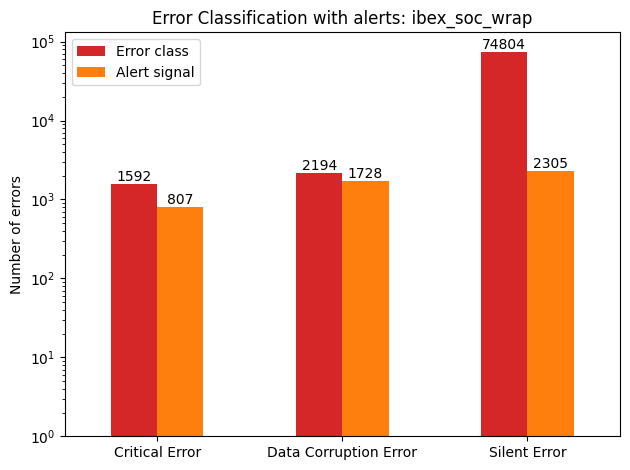

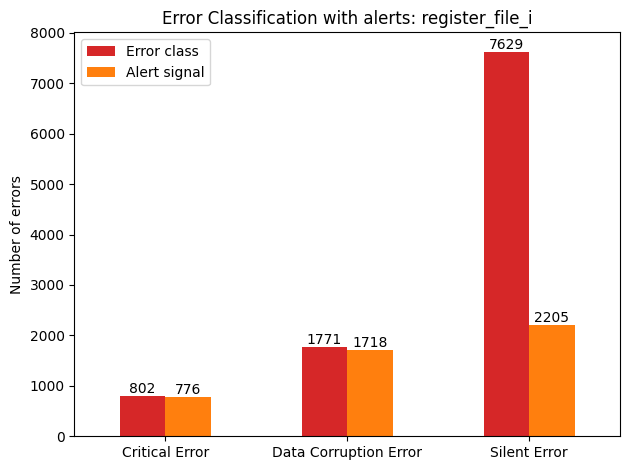

In [8]:
# node_classifications, node_fig = BaseTools.error_classification(
#     node_data, data_interface.golden_log, True
# )
# root_classifications, root_fig = BaseTools.error_classification(
#     root_data, data_interface.golden_log, True
# )

alert_classifications = IbexHwsecCoremarkTools.alert_classification(
    root_data, data_interface.golden_log, True
)

alert_classifications = IbexHwsecCoremarkTools.alert_classification(
    node_data, data_interface.golden_log, True
)

/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_coremark_tools.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


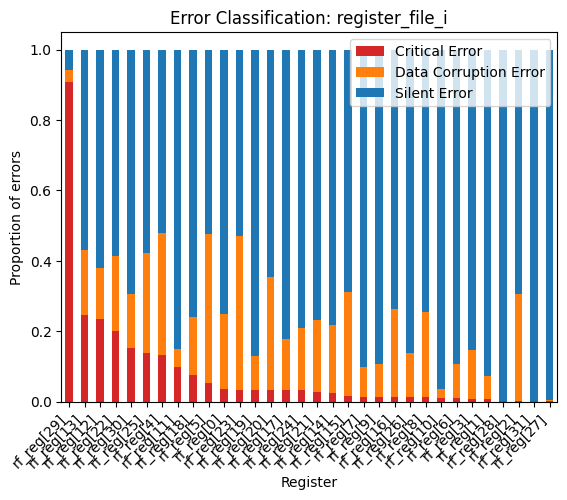

In [9]:
stacked = IbexHwsecCoremarkTools.stacked_register_error_class(
    node_data, data_interface.golden_log, True
)


1 nodes found with name register_file_i


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


2 nodes found with name if_stage_i


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


2 nodes found with name id_stage_i


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


2 nodes found with name ex_block_i


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


2 nodes found with name load_store_unit_i


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


2 nodes found with name cs_registers_i


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


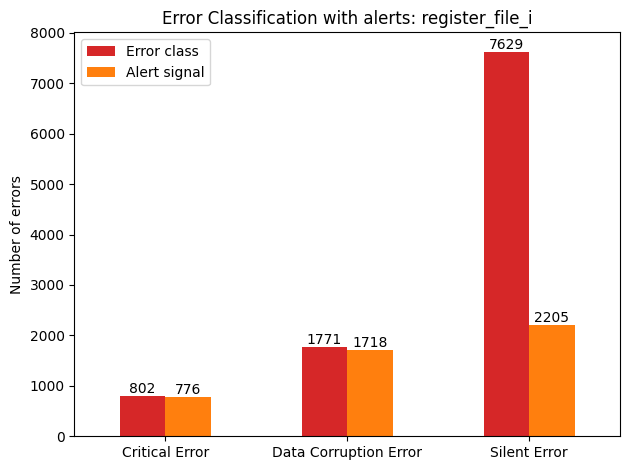

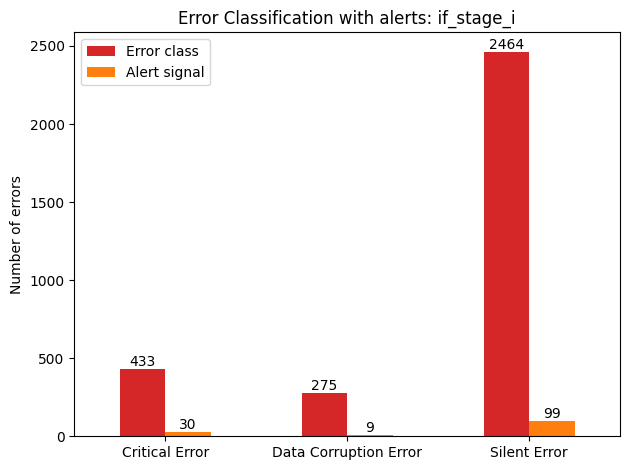

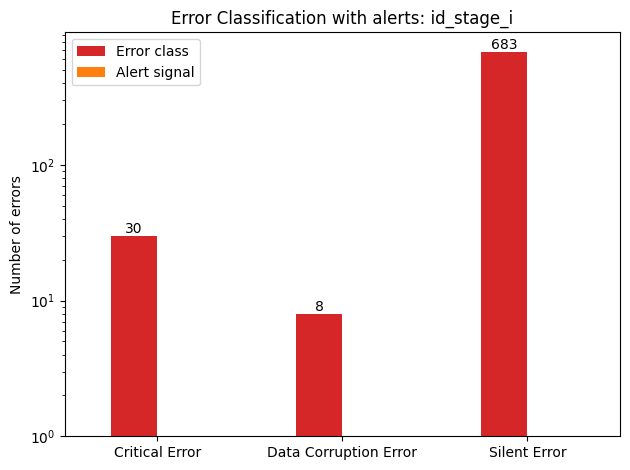

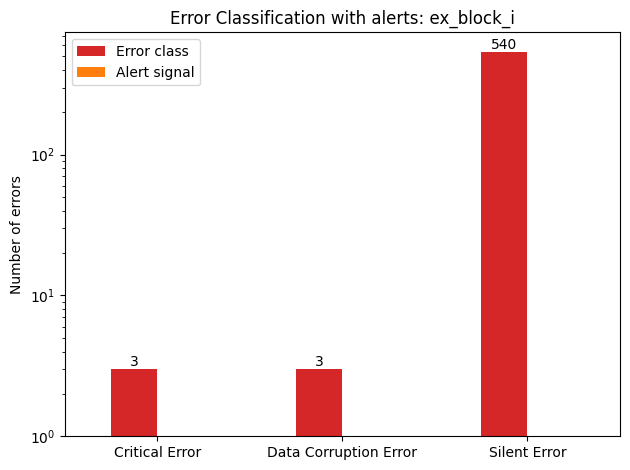

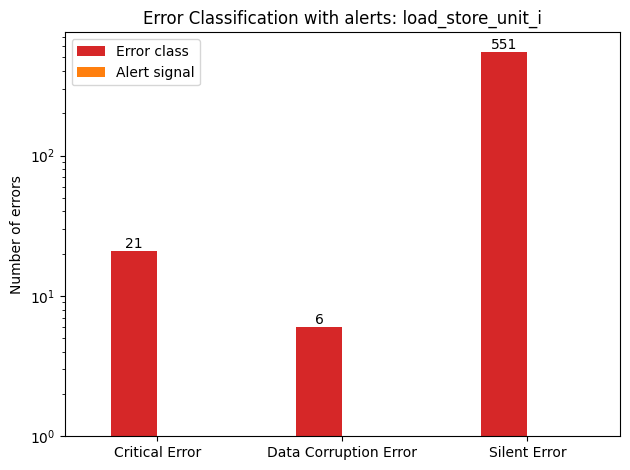

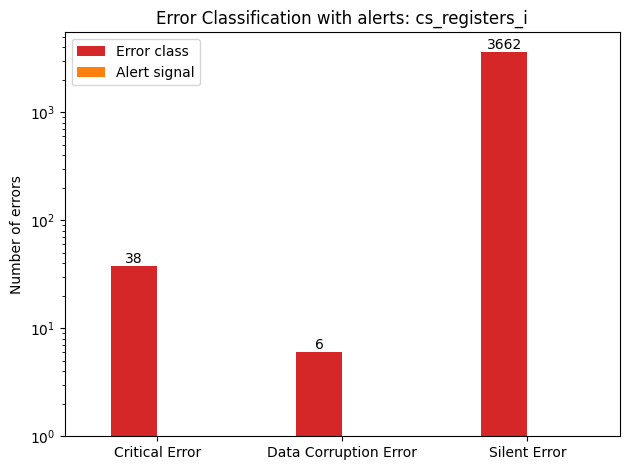

In [36]:
node_list = ["register_file_i", "if_stage_i", "id_stage_i", "ex_block_i", "load_store_unit_i", "cs_registers_i"]
import pandas as pd 
df_result = pd.DataFrame()

to_csv=False

for node_name in node_list:
    nodes_found = data_interface.get_node_by_name(node_name)
    print(f"{len(nodes_found)} nodes found with name {node_name}")
    for node in nodes_found:
        if "lockstep" not in node.soc_path:

            node_data = data_interface.get_data_by_node(node)
            df_alert,fig = IbexHwsecCoremarkTools.alert_classification(
                node_data, data_interface.golden_log, True)
                        
            df_alert = df_alert[df_alert["Critical Error"]==1]
            df_join = df_alert.merge(node_data, left_index=True, right_index=True)
            df_join = df_join[["register", "bit_number", "injection_cycle_y"]]

            # generating a df of runs that i would like to rerun,  e.g. which have crit_error=1 
            df_result = pd.concat([df_result, df_join], ignore_index=True)
            
            # save individual module injections and full data to csv
            if to_csv: df_join.to_csv(f"df_crit_{node_name}.csv")

 

In [29]:
# Create df with all columns and only critical error=1 
path = "ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibex_top.u_ibex_core.if_stage_i"

node = data_interface.get_node_by_path(path)
node_data = data_interface.get_data_by_node(node)

df_alert = IbexHwsecCoremarkTools.alert_classification(
                node_data, data_interface.golden_log, False)
            
df_alert = df_alert[df_alert["Critical Error"]==1]
df_alert = df_alert[]

df_join = df_alert.merge(node_data, left_index=True, right_index=True)